In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

## Data Extraction

In [2]:
src_url = 'https://cdd.publicsafety.gc.ca/prnt-eng.aspx?cultureCode=en-Ca&provinces=9&normalizedCostYear=1&dynamic=false'

In [3]:
response = requests.get(src_url)
if response.status_code != 200:
    print(f'Unable to retrive {src_url}.\nThe request failed with status code {response.status_code}')


In [4]:
soup_obj = BeautifulSoup(response.text, 'html.parser')
items = soup_obj.find_all('div', class_='itemTemplate')

data = []
for item in items:
    rows = item.find_all('tr')
    data_items = {}
    for row in rows:
        th_elements = row.find_all('th')
        for th_element in th_elements:
            key = th_element.text.strip(': ')
            val = th_element.find_next('td').text.strip()
            data_items[key] = val
    data.append(data_items)

df = pd.DataFrame(data)
print(df.shape)
print(df.columns)

(340, 9)
Index(['Event Type', 'Fatalities', 'Place', 'Injured / Infected', 'Event Date',
       'Evacuated', 'Estimated Total Cost', '', 'Comments'],
      dtype='object')


In [5]:
df.drop(columns='', inplace=True)
display(df.head())

,Event Type,Fatalities,Place,Injured / Infected,Event Date,Evacuated,Estimated Total Cost,Comments
0,Meteorological - Hydrological | Storm - Unspec...,Unknown,"Ontario, Quebec",Unknown,"November 15, 2020",Unknown,Unknown,"On November 15th, a strong frontal system pass..."
1,Meteorological - Hydrological | Winter Storm,Unknown,Southern Ontairo and southern Quebec,Unknown,"January 10, 2020",Unknown,Unknown,"On January 10th, a low pressure system moved t..."
2,Meteorological - Hydrological | Storm - Unspec...,Unknown,Eastern Canada,Unknown,"October 31, 2019",Unknown,Unknown,"For many communities across eastern Canada, th..."
3,Meteorological - Hydrological | Wildfire,Unknown,Pikangikum First Nation,Unknown,"May 30, 2019",2500,Unknown,"In May of 2019, the Pikangikum First Nation wa..."
4,Meteorological - Hydrological | Flood,1,Eastern Canada,Unknown,"April 18, 2019",10000,Unknown,Extensive flooding in April and May was experi...


## Data Preprocessing

In [6]:
df = df.replace('Unknown', np.nan)
df.isnull().sum()


Event Type                0
Fatalities              206
Place                     0
Injured / Infected      247
Event Date                0
Evacuated               251
Estimated Total Cost    285
Comments                  0
dtype: int64

In [7]:
for col in ['Fatalities', 'Injured / Infected', 'Evacuated']:
    df[col] = df[col].astype(float)
df['Estimated Total Cost'] = df['Estimated Total Cost'].str.replace('$', '').str.replace(',', '').astype(float)
df['Event Date'] = pd.to_datetime(df['Event Date'])

In [8]:
df

,Event Type,Fatalities,Place,Injured / Infected,Event Date,Evacuated,Estimated Total Cost,Comments
0,Meteorological - Hydrological | Storm - Unspec...,NaN,"Ontario, Quebec",NaN,2020-11-15,NaN,NaN,"On November 15th, a strong frontal system pass..."
1,Meteorological - Hydrological | Winter Storm,NaN,Southern Ontairo and southern Quebec,NaN,2020-01-10,NaN,NaN,"On January 10th, a low pressure system moved t..."
2,Meteorological - Hydrological | Storm - Unspec...,NaN,Eastern Canada,NaN,2019-10-31,NaN,NaN,"For many communities across eastern Canada, th..."
3,Meteorological - Hydrological | Wildfire,NaN,Pikangikum First Nation,NaN,2019-05-30,2500.0,NaN,"In May of 2019, the Pikangikum First Nation wa..."
4,Meteorological - Hydrological | Flood,1.0,Eastern Canada,NaN,2019-04-18,10000.0,NaN,Extensive flooding in April and May was experi...
...,...,...,...,...,...,...,...,...
335,Transportation accident | Marine,21.0,Lake Superior,NaN,1902-11-21,NaN,NaN,"The 75 m (245 ft) canal steamer the ""Bannockbu..."
336,Meteorological - Hydrological | Tornado,5.0,"Chesterfield, Ontario",12.0,1902-07-17,NaN,NaN,"On July 17th, a strong tornado tracked through..."
337,Fire | Non-Residential,NaN,"Paris, Ontario",NaN,1900-09-12,NaN,NaN,"On the morning of September 12th, a fire broke..."
338,Meteorological - Hydrological | Hurricane / Ty...,54.0,Eastern Canada,NaN,1900-09-11,NaN,NaN,Remnants of the Great Galveston Hurricane cros...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Event Type            340 non-null    object        
 1   Fatalities            134 non-null    float64       
 2   Place                 340 non-null    object        
 3   Injured / Infected    93 non-null     float64       
 4   Event Date            340 non-null    datetime64[ns]
 5   Evacuated             89 non-null     float64       
 6   Estimated Total Cost  55 non-null     float64       
 7   Comments              340 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 21.4+ KB


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Event Type,340,39,Meteorological - Hydrological | Flood,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fatalities,134.0,NaN,NaN,NaN,415.291045,1.0,3.0,10.5,25.75,50000.0,4317.447409
Place,340,203,Southern Ontario,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Injured / Infected,93.0,NaN,NaN,NaN,21918.817204,1.0,9.0,35.0,100.0,2000000.0,207351.943744
Event Date,340,NaN,NaN,NaN,1977-02-22 14:40:56.470588224,1900-04-26 00:00:00,1952-11-08 12:00:00,1988-01-01 00:00:00,2005-08-06 06:00:00,2020-11-15 00:00:00,NaN
Evacuated,89.0,NaN,NaN,NaN,4515.58427,5.0,250.0,823.0,2000.0,225000.0,23860.977898
Estimated Total Cost,55.0,NaN,NaN,NaN,175213079.818182,75000.0,5841154.5,27379000.0,114429500.0,4635720433.0,636277655.223999
Comments,340,340,"On November 15th, a strong frontal system pass...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Extraction

In [11]:
df.rename(columns={'Event Type': 'Src Event Type'}, inplace=True)

In [12]:
df[['Event Category', 'Event Type']] = df['Src Event Type'].str.split('|', n=1, expand=True)
df['Event Category'] = df['Event Category'].str.strip()
df['Event Type'] = df['Event Type'].str.strip()
df

,Src Event Type,Fatalities,Place,Injured / Infected,Event Date,Evacuated,Estimated Total Cost,Comments,Event Category,Event Type
0,Meteorological - Hydrological | Storm - Unspec...,NaN,"Ontario, Quebec",NaN,2020-11-15,NaN,NaN,"On November 15th, a strong frontal system pass...",Meteorological - Hydrological,Storm - Unspecified / Other
1,Meteorological - Hydrological | Winter Storm,NaN,Southern Ontairo and southern Quebec,NaN,2020-01-10,NaN,NaN,"On January 10th, a low pressure system moved t...",Meteorological - Hydrological,Winter Storm
2,Meteorological - Hydrological | Storm - Unspec...,NaN,Eastern Canada,NaN,2019-10-31,NaN,NaN,"For many communities across eastern Canada, th...",Meteorological - Hydrological,Storm - Unspecified / Other
3,Meteorological - Hydrological | Wildfire,NaN,Pikangikum First Nation,NaN,2019-05-30,2500.0,NaN,"In May of 2019, the Pikangikum First Nation wa...",Meteorological - Hydrological,Wildfire
4,Meteorological - Hydrological | Flood,1.0,Eastern Canada,NaN,2019-04-18,10000.0,NaN,Extensive flooding in April and May was experi...,Meteorological - Hydrological,Flood
...,...,...,...,...,...,...,...,...,...,...
335,Transportation accident | Marine,21.0,Lake Superior,NaN,1902-11-21,NaN,NaN,"The 75 m (245 ft) canal steamer the ""Bannockbu...",Transportation accident,Marine
336,Meteorological - Hydrological | Tornado,5.0,"Chesterfield, Ontario",12.0,1902-07-17,NaN,NaN,"On July 17th, a strong tornado tracked through...",Meteorological - Hydrological,Tornado
337,Fire | Non-Residential,NaN,"Paris, Ontario",NaN,1900-09-12,NaN,NaN,"On the morning of September 12th, a fire broke...",Fire,Non-Residential
338,Meteorological - Hydrological | Hurricane / Ty...,54.0,Eastern Canada,NaN,1900-09-11,NaN,NaN,Remnants of the Great Galveston Hurricane cros...,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm


In [13]:
# Check if the columns exist in the DataFrame
required_columns = ['Impact_Score', 'Normalized_Fatalities', 'Normalized_Injuries', 'Normalized_Evacuated', 'Normalized_Cost']
if all(column in df.columns for column in required_columns):
    # Sort the DataFrame by 'Impact_Score' and select the desired columns
    sorted_df = df.sort_values(by='Impact_Score', ascending=False)[required_columns]
    # Reorder the columns
    desired_order = ['Normalized_Fatalities', 'Normalized_Injuries', 'Normalized_Evacuated', 'Normalized_Cost', 'Impact_Score']
    sorted_df = sorted_df[desired_order]
    # Output the sorted DataFrame
    print(sorted_df)
else:
    # Handle the case when the columns do not exist
    missing_columns = [column for column in required_columns if column not in df.columns]
    print(f"The following columns are missing in the DataFrame: {missing_columns}")

The following columns are missing in the DataFrame: ['Impact_Score', 'Normalized_Fatalities', 'Normalized_Injuries', 'Normalized_Evacuated', 'Normalized_Cost']


In [14]:
df['Year'] = df['Event Date'].dt.year
df['Month'] = df['Event Date'].dt.month
df['Date'] = df['Event Date'].dt.day
df

,Src Event Type,Fatalities,Place,Injured / Infected,Event Date,Evacuated,Estimated Total Cost,Comments,Event Category,Event Type,Year,Month,Date
0,Meteorological - Hydrological | Storm - Unspec...,NaN,"Ontario, Quebec",NaN,2020-11-15,NaN,NaN,"On November 15th, a strong frontal system pass...",Meteorological - Hydrological,Storm - Unspecified / Other,2020,11,15
1,Meteorological - Hydrological | Winter Storm,NaN,Southern Ontairo and southern Quebec,NaN,2020-01-10,NaN,NaN,"On January 10th, a low pressure system moved t...",Meteorological - Hydrological,Winter Storm,2020,1,10
2,Meteorological - Hydrological | Storm - Unspec...,NaN,Eastern Canada,NaN,2019-10-31,NaN,NaN,"For many communities across eastern Canada, th...",Meteorological - Hydrological,Storm - Unspecified / Other,2019,10,31
3,Meteorological - Hydrological | Wildfire,NaN,Pikangikum First Nation,NaN,2019-05-30,2500.0,NaN,"In May of 2019, the Pikangikum First Nation wa...",Meteorological - Hydrological,Wildfire,2019,5,30
4,Meteorological - Hydrological | Flood,1.0,Eastern Canada,NaN,2019-04-18,10000.0,NaN,Extensive flooding in April and May was experi...,Meteorological - Hydrological,Flood,2019,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Transportation accident | Marine,21.0,Lake Superior,NaN,1902-11-21,NaN,NaN,"The 75 m (245 ft) canal steamer the ""Bannockbu...",Transportation accident,Marine,1902,11,21
336,Meteorological - Hydrological | Tornado,5.0,"Chesterfield, Ontario",12.0,1902-07-17,NaN,NaN,"On July 17th, a strong tornado tracked through...",Meteorological - Hydrological,Tornado,1902,7,17
337,Fire | Non-Residential,NaN,"Paris, Ontario",NaN,1900-09-12,NaN,NaN,"On the morning of September 12th, a fire broke...",Fire,Non-Residential,1900,9,12
338,Meteorological - Hydrological | Hurricane / Ty...,54.0,Eastern Canada,NaN,1900-09-11,NaN,NaN,Remnants of the Great Galveston Hurricane cros...,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm,1900,9,11


In [15]:
df['Event Category'].value_counts()

Event Category
Meteorological - Hydrological    203
Transportation accident           46
Hazardous Chemicals               26
Fire                              20
Biological                        20
Explosion                          9
Geological                         5
Terrorist                          4
Infrastructure failure             4
Arson                              2
Civil Incident                     1
Name: count, dtype: int64

In [16]:
df['Month'].value_counts()

Month
1     47
7     41
5     37
4     37
3     29
8     29
6     24
2     23
9     22
12    18
11    17
10    16
Name: count, dtype: int64

### Filtering only Natural disasters

In [17]:
df = df[df['Event Category'].isin(['Meteorological - Hydrological', 'Geological', 'Fire'])]

### Normalizing features

In [18]:
df['Normalized_Fatalities'] = np.where(np.isnan(df['Fatalities']), 0, df['Fatalities'] / df['Fatalities'].max()).copy()
df['Normalized_Injuries'] = np.where(np.isnan(df['Injured / Infected']), 0, df['Injured / Infected'] / df['Injured / Infected'].max()).copy()
df['Normalized_Evacuated'] = np.where(np.isnan(df['Evacuated']), 0, df['Evacuated'] / df['Evacuated'].max()).copy()
df['Normalized_Cost'] = np.where(np.isnan(df['Estimated Total Cost']), 0, df['Estimated Total Cost'] / df['Estimated Total Cost'].max()).copy()


C:\Users\nihal\AppData\Local\Temp\ipykernel_15644\773672438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalized_Fatalities'] = np.where(np.isnan(df['Fatalities']), 0, df['Fatalities'] / df['Fatalities'].max()).copy()
C:\Users\nihal\AppData\Local\Temp\ipykernel_15644\773672438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Normalized_Injuries'] = np.where(np.isnan(df['Injured / Infected']), 0, df['Injured / Infected'] / df['Injured / Infected'].max()).copy()
C:\Users\nihal\AppData\Loc

In [19]:
df

,Src Event Type,Fatalities,Place,Injured / Infected,Event Date,Evacuated,Estimated Total Cost,Comments,Event Category,Event Type,Year,Month,Date,Normalized_Fatalities,Normalized_Injuries,Normalized_Evacuated,Normalized_Cost
0,Meteorological - Hydrological | Storm - Unspec...,NaN,"Ontario, Quebec",NaN,2020-11-15,NaN,NaN,"On November 15th, a strong frontal system pass...",Meteorological - Hydrological,Storm - Unspecified / Other,2020,11,15,0.000000,0.000000,0.000000,0.0
1,Meteorological - Hydrological | Winter Storm,NaN,Southern Ontairo and southern Quebec,NaN,2020-01-10,NaN,NaN,"On January 10th, a low pressure system moved t...",Meteorological - Hydrological,Winter Storm,2020,1,10,0.000000,0.000000,0.000000,0.0
2,Meteorological - Hydrological | Storm - Unspec...,NaN,Eastern Canada,NaN,2019-10-31,NaN,NaN,"For many communities across eastern Canada, th...",Meteorological - Hydrological,Storm - Unspecified / Other,2019,10,31,0.000000,0.000000,0.000000,0.0
3,Meteorological - Hydrological | Wildfire,NaN,Pikangikum First Nation,NaN,2019-05-30,2500.0,NaN,"In May of 2019, the Pikangikum First Nation wa...",Meteorological - Hydrological,Wildfire,2019,5,30,0.000000,0.000000,0.140449,0.0
4,Meteorological - Hydrological | Flood,1.0,Eastern Canada,NaN,2019-04-18,10000.0,NaN,Extensive flooding in April and May was experi...,Meteorological - Hydrological,Flood,2019,4,18,0.000847,0.000000,0.561798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Meteorological - Hydrological | Geomagnetic Storm,NaN,Across Canada,NaN,1903-10-31,NaN,NaN,"On October 31st, a geomagnetic storm that last...",Meteorological - Hydrological,Geomagnetic Storm,1903,10,31,0.000000,0.000000,0.000000,0.0
336,Meteorological - Hydrological | Tornado,5.0,"Chesterfield, Ontario",12.0,1902-07-17,NaN,NaN,"On July 17th, a strong tornado tracked through...",Meteorological - Hydrological,Tornado,1902,7,17,0.004237,0.012698,0.000000,0.0
337,Fire | Non-Residential,NaN,"Paris, Ontario",NaN,1900-09-12,NaN,NaN,"On the morning of September 12th, a fire broke...",Fire,Non-Residential,1900,9,12,0.000000,0.000000,0.000000,0.0
338,Meteorological - Hydrological | Hurricane / Ty...,54.0,Eastern Canada,NaN,1900-09-11,NaN,NaN,Remnants of the Great Galveston Hurricane cros...,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm,1900,9,11,0.045763,0.000000,0.000000,0.0


### Calculating Impact Score

In [20]:
# Weights of the features
w_fatalities = 0.4
w_injuries = 0.25
w_evacuated = 0.15
w_cost = 0.2

# Weighted sum of features
df['Impact_Score'] = w_fatalities * df['Normalized_Fatalities'] + w_injuries * df['Normalized_Injuries'] + w_evacuated * df['Normalized_Evacuated'] + w_cost * df['Normalized_Cost'].copy()


C:\Users\nihal\AppData\Local\Temp\ipykernel_15644\3826039172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Impact_Score'] = w_fatalities * df['Normalized_Fatalities'] + w_injuries * df['Normalized_Injuries'] + w_evacuated * df['Normalized_Evacuated'] + w_cost * df['Normalized_Cost'].copy()


In [21]:
df

,Src Event Type,Fatalities,Place,Injured / Infected,Event Date,Evacuated,Estimated Total Cost,Comments,Event Category,Event Type,Year,Month,Date,Normalized_Fatalities,Normalized_Injuries,Normalized_Evacuated,Normalized_Cost,Impact_Score
0,Meteorological - Hydrological | Storm - Unspec...,NaN,"Ontario, Quebec",NaN,2020-11-15,NaN,NaN,"On November 15th, a strong frontal system pass...",Meteorological - Hydrological,Storm - Unspecified / Other,2020,11,15,0.000000,0.000000,0.000000,0.0,0.000000
1,Meteorological - Hydrological | Winter Storm,NaN,Southern Ontairo and southern Quebec,NaN,2020-01-10,NaN,NaN,"On January 10th, a low pressure system moved t...",Meteorological - Hydrological,Winter Storm,2020,1,10,0.000000,0.000000,0.000000,0.0,0.000000
2,Meteorological - Hydrological | Storm - Unspec...,NaN,Eastern Canada,NaN,2019-10-31,NaN,NaN,"For many communities across eastern Canada, th...",Meteorological - Hydrological,Storm - Unspecified / Other,2019,10,31,0.000000,0.000000,0.000000,0.0,0.000000
3,Meteorological - Hydrological | Wildfire,NaN,Pikangikum First Nation,NaN,2019-05-30,2500.0,NaN,"In May of 2019, the Pikangikum First Nation wa...",Meteorological - Hydrological,Wildfire,2019,5,30,0.000000,0.000000,0.140449,0.0,0.021067
4,Meteorological - Hydrological | Flood,1.0,Eastern Canada,NaN,2019-04-18,10000.0,NaN,Extensive flooding in April and May was experi...,Meteorological - Hydrological,Flood,2019,4,18,0.000847,0.000000,0.561798,0.0,0.084609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,Meteorological - Hydrological | Geomagnetic Storm,NaN,Across Canada,NaN,1903-10-31,NaN,NaN,"On October 31st, a geomagnetic storm that last...",Meteorological - Hydrological,Geomagnetic Storm,1903,10,31,0.000000,0.000000,0.000000,0.0,0.000000
336,Meteorological - Hydrological | Tornado,5.0,"Chesterfield, Ontario",12.0,1902-07-17,NaN,NaN,"On July 17th, a strong tornado tracked through...",Meteorological - Hydrological,Tornado,1902,7,17,0.004237,0.012698,0.000000,0.0,0.004870
337,Fire | Non-Residential,NaN,"Paris, Ontario",NaN,1900-09-12,NaN,NaN,"On the morning of September 12th, a fire broke...",Fire,Non-Residential,1900,9,12,0.000000,0.000000,0.000000,0.0,0.000000
338,Meteorological - Hydrological | Hurricane / Ty...,54.0,Eastern Canada,NaN,1900-09-11,NaN,NaN,Remnants of the Great Galveston Hurricane cros...,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm,1900,9,11,0.045763,0.000000,0.000000,0.0,0.018305


In [22]:
# df['Impact_Score'].isnull().sum()
df['Impact_Score'].describe()

count    228.000000
mean       0.014316
std        0.052773
min        0.000000
25%        0.000000
50%        0.001685
75%        0.008427
max        0.611864
Name: Impact_Score, dtype: float64

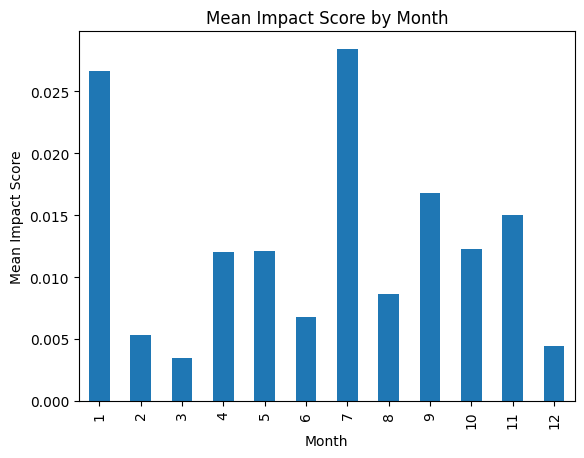

In [23]:
import matplotlib.pyplot as plt
# Plotting Impact score by months
monthly_data = df.groupby('Month')
mean_scores = monthly_data['Impact_Score'].mean()
mean_scores.plot(kind='bar')
 
plt.title('Mean Impact Score by Month')
plt.xlabel('Month')
plt.ylabel('Mean Impact Score')
 
plt.show()

## Time Series Analysis

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

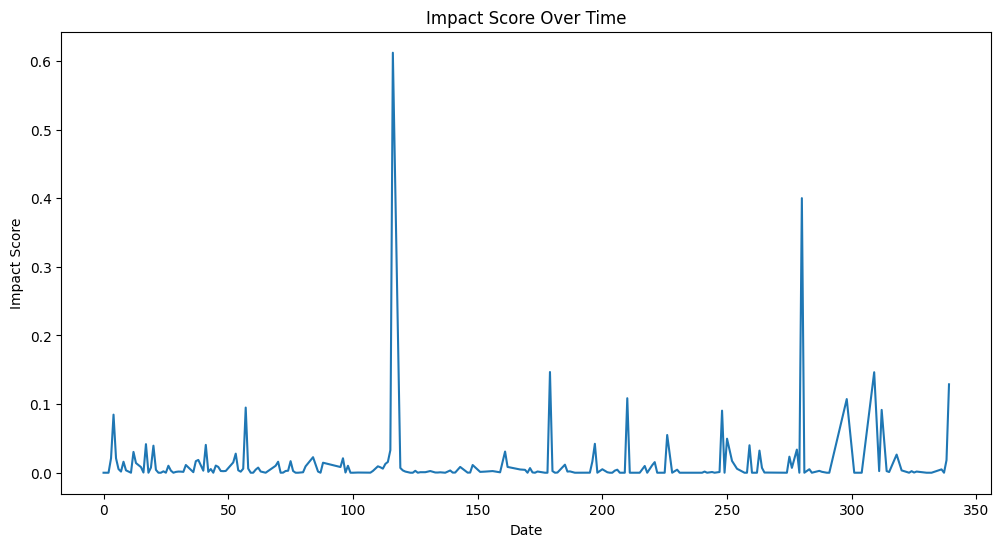

In [37]:
# Plotting Time series data
plt.figure(figsize=(12, 6))
plt.plot(df['Impact_Score'])
plt.title('Impact Score Over Time')
plt.xlabel('Date')
plt.ylabel('Impact Score')
plt.show()

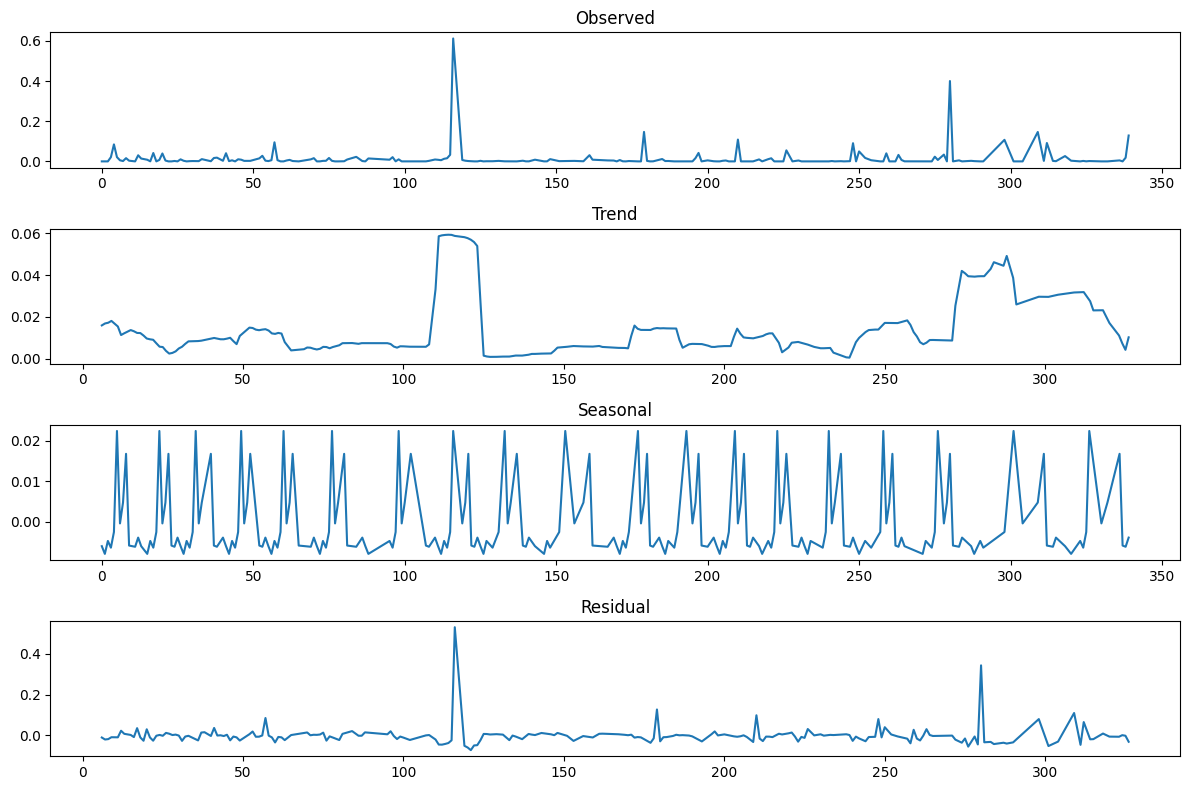

In [38]:
# Decomposing the Time series data

result = seasonal_decompose(df['Impact_Score'], model='additive', period=12)  # Assuming a seasonal period of 12, adjust as needed

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

There is no interesting Trends, however we can observe seasonality

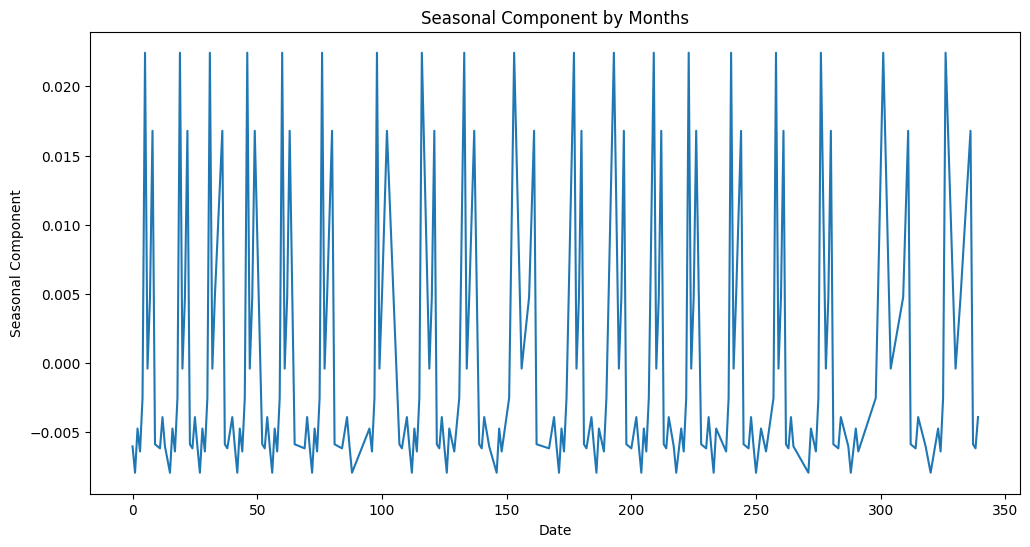

In [39]:
# Plot the seasonal component by months
plt.figure(figsize=(12, 6))
result.seasonal.plot()
plt.title('Seasonal Component by Months')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.show()

### SARIMA Modeling

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [41]:
df = df.set_index('Event Date')

In [42]:
# Since the better seasonality can be observed after 1975, we are considering data only after 1975
df1 = df[df['Year'] >= 1975]
df1.shape

(157, 17)

In [43]:
features = df1[['Fatalities', 'Injured / Infected', 'Evacuated', 'Estimated Total Cost']]
target = df1['Impact_Score']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, shuffle=False)


In [45]:
order = (1, 1, 1)  
seasonal_order = (1, 1, 1, 12)  

sarima_model1 = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_result1 = sarima_model1.fit(disp=False)

c:\Users\nihal\IMDB and RottenTomatoes Data\venv\ML_classic_ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nihal\IMDB and RottenTomatoes Data\venv\ML_classic_ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nihal\IMDB and RottenTomatoes Data\venv\ML_classic_ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nihal\IMDB and RottenTomatoes Data\venv\ML_classic_ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has

In [46]:
predictions1 = sarima_result1.get_forecast(steps=len(X_test))
predictions_mean1 = predictions1.predicted_mean
predictions_mean1

c:\Users\nihal\IMDB and RottenTomatoes Data\venv\ML_classic_ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nihal\IMDB and RottenTomatoes Data\venv\ML_classic_ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


125    0.083857
126    0.010862
127    0.007640
128    0.004829
129    0.009604
130    0.014411
131    0.008608
132    0.013979
133    0.008628
134    0.018431
135    0.015920
136    0.012765
137    0.075046
138    0.010644
139    0.007578
140    0.008807
141    0.010258
142    0.014028
143    0.008868
144    0.013069
145    0.009195
146    0.017028
147    0.014773
148    0.012218
149    0.076920
150    0.011468
151    0.008383
152    0.009118
153    0.010975
154    0.014872
155    0.009634
156    0.013977
Name: predicted_mean, dtype: float64

In [47]:
mse1 = mean_squared_error(y_test, predictions_mean1)
print(f'Mean Squared Error on Test Set: {mse1}')

Mean Squared Error on Test Set: 0.0016051790889318402


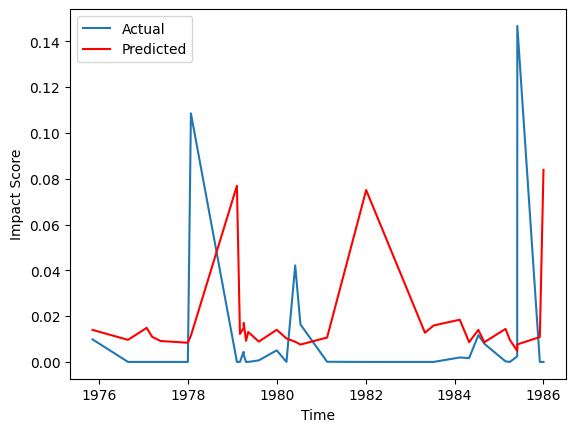

In [48]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, predictions_mean1, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Impact Score')
plt.legend()
plt.show()